In [172]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
from statsmodels.stats.proportion import proportion_confint
from matplotlib.colors import LogNorm

/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [173]:
dich_type = "geomean"
dataset = "Yu_First_wave_endocrine_cells"
checkpoint = "1000"

In [174]:
orig_df = pd.read_csv("{}.csv".format(dataset), index_col="gene_id")
# orig_df = pd.read_csv("{}/intermediate/{}/dichotomised_genes.csv".format(dataset, dich_type), index_col="gene_id")

In [175]:
dichotomised_df = pd.read_csv("{}/intermediate/{}/dichotomised_genes.csv".format(dataset, dich_type), index_col="gene_id")

In [176]:
# chr_names = list(range(1,22)) + ["X", "Y"]
chr_names = list(range(1,20)) + ["X", "Y"]
ic_dfs = [pd.read_csv("{}/results/{}/stage1_chr{}_IC.csv".format(dataset,dich_type,x)) for x in chr_names]
chrs = {x: pd.read_csv("{}/intermediate/chr{}_filtered.csv".format(dataset, x)) for x in chr_names}
filtered_genes = pd.read_csv("{}/intermediate/{}/filtered_dichotomised_genes.csv".format(dataset, dich_type))
for i, name in zip(range(len(ic_dfs)), chr_names):
    ic_dfs[i].loc[:,"chromosome"] = name

ic_df = pd.concat(ic_dfs).reset_index(drop=True)

In [177]:
ic_df.dropna()

,start,end,stretch,n_genes,obs_var,pb_var,ic,mean_expression,chromosome
0,0.0,7.0,7.0,4.0,0.048253,0.044984,1.072669,0.045662,1
1,1.0,8.0,7.0,3.0,0.033442,0.029258,1.142998,0.029680,1
2,2.0,9.0,7.0,3.0,0.033442,0.029258,1.142998,0.029680,1
3,3.0,10.0,7.0,3.0,0.024539,0.024754,0.991314,0.025114,1
4,4.0,11.0,7.0,3.0,0.024539,0.024754,0.991314,0.025114,1
...,...,...,...,...,...,...,...,...,...
70818,0.0,14.0,14.0,7.0,2.621402,1.062238,2.467810,1.634703,Y
70819,1.0,15.0,14.0,7.0,2.621402,1.062238,2.467810,1.634703,Y
70820,2.0,16.0,14.0,7.0,2.621402,1.062238,2.467810,1.634703,Y
70821,3.0,17.0,14.0,6.0,2.373390,0.926414,2.561910,1.472603,Y


In [178]:
shuffled_ic_df = pd.read_csv("{}/results/{}/shuffled_IC.csv".format(dataset, dich_type))

In [179]:
shuffled_ic_df

,start,end,stretch,n_genes,obs_var,pb_var,ic,mean_expression,iteration
0,0,7,7,5.0,0.806647,0.771695,1.045292,1.139269,0
1,1,8,7,6.0,1.088472,0.967463,1.125078,1.406393,0
2,2,9,7,7.0,1.088895,0.969741,1.122872,1.408676,0
3,3,10,7,7.0,1.124270,0.988835,1.136964,1.429224,0
4,4,11,7,7.0,1.342617,1.118268,1.200622,1.641553,0
...,...,...,...,...,...,...,...,...,...
70822995,0,14,14,7.0,0.960074,0.948208,1.012515,1.634703,999
70822996,1,15,14,7.0,0.960074,0.948208,1.012515,1.634703,999
70822997,2,16,14,7.0,0.960074,0.948208,1.012515,1.634703,999
70822998,3,17,14,6.0,0.936674,0.932482,1.004496,1.618721,999


# KS-test

'Stretch size 7'

Ks_2sampResult(statistic=0.16236558487729458, pvalue=2.9868697594541573e-170)

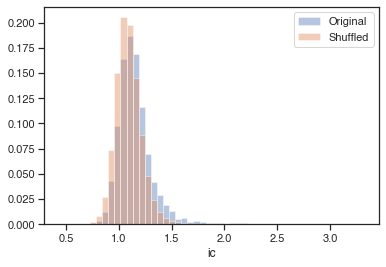

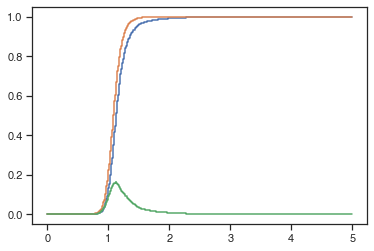

'Stretch size 14'

Ks_2sampResult(statistic=0.19254572891038146, pvalue=1.4020032687588594e-126)

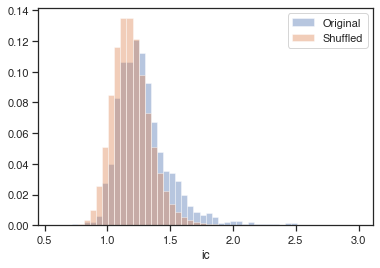

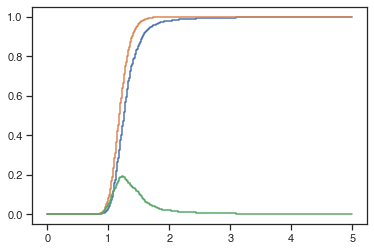

'Stretch size 21'

Ks_2sampResult(statistic=0.22898790285344905, pvalue=8.188812674905274e-101)

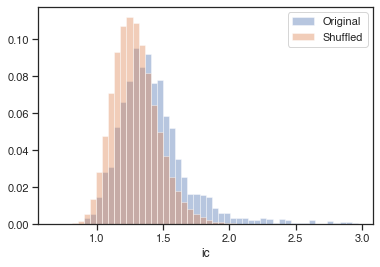

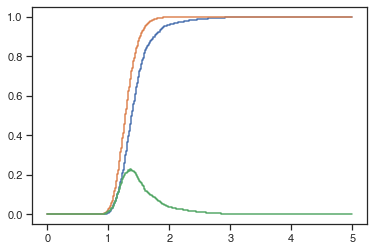

In [180]:
sns.set(context="notebook", style="ticks", font="Helvetica")

def get_norm(arr):
    return {
        "weights": np.ones(len(arr)) / len(arr)
    }

ks_summaries = []
for stretch in [7,14,21]:
    n_bins=50
    display("Stretch size {}".format(stretch))
    sequential = ic_df[(ic_df.stretch == stretch) & (ic_df.n_genes >= stretch / 7 * 6)].ic
    shuffled = shuffled_ic_df[(shuffled_ic_df.stretch == stretch) & (shuffled_ic_df.n_genes > stretch / 7 * 6)].ic
    display(ks_2samp(sequential, shuffled))
    ks_summaries += [{
        "stretch_size": stretch,
        "ks": ks_2samp(sequential, shuffled)
    }]
    bins=np.histogram(shuffled.dropna(), bins=n_bins)[1]
    sns.distplot(sequential.dropna(), kde=False, hist_kws=get_norm(sequential.dropna()), label="Original", bins=bins)
    sns.distplot(shuffled.dropna(), kde=False, hist_kws=get_norm(shuffled.dropna()), label="Shuffled", bins=bins)
    plt.legend()
#     plt.arrow(2.18,1.5,0,-1,head_width=0.02, fc='k', ec='k')
#     plt.arrow(2.23,1.5,0,-1,head_width=0.02, fc='k', ec='k')
#     plt.arrow(2.57,1.2,0,-1,head_width=0.05, fc='k', ec='k')
#     plt.arrow(2.63,1.2,0,-1,head_width=0.05, fc='k', ec='k')
    
    plt.show()
    
    df_ecdf = ECDF(sequential)
    shuffled_df_ecdf = ECDF(shuffled)
    x = np.arange(0,5,0.01)
    sns.lineplot(x, df_ecdf(x), drawstyle='steps-post')
    sns.lineplot(x, shuffled_df_ecdf(x), drawstyle='steps-post')
    sns.lineplot(x, shuffled_df_ecdf(x) - df_ecdf(x), drawstyle='steps-post')
    plt.show()

For the figure

'Stretch size 14'

Ks_2sampResult(statistic=0.19254572891038146, pvalue=1.4020032687588594e-126)

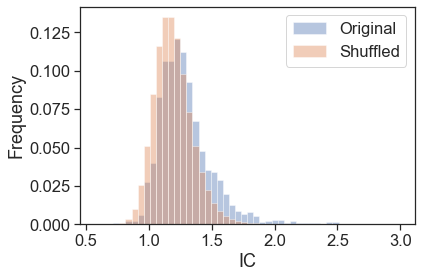

In [181]:
stretch=14
n_bins=50
sns.set(font_scale=1.5, style="ticks", font="Arial")
display("Stretch size {}".format(stretch))
sequential = ic_df[(ic_df.stretch == stretch) & (ic_df.n_genes >= stretch / 7 * 6)].ic
shuffled = shuffled_ic_df[(shuffled_ic_df.stretch == stretch) & (shuffled_ic_df.n_genes > stretch / 7 * 6)].ic
display(ks_2samp(sequential, shuffled))
ks_summaries += [{
    "stretch_size": stretch,
    "ks": ks_2samp(sequential, shuffled)
}]
bins=np.histogram(shuffled.dropna(), bins=n_bins)[1]

sns.distplot(sequential.dropna(), kde=False, hist_kws=get_norm(sequential.dropna()), label="Original", bins=bins)
sns.distplot(shuffled.dropna(), kde=False, hist_kws=get_norm(shuffled.dropna()), label="Shuffled", bins=bins)
plt.legend()
plt.xlabel("IC")
plt.ylabel("Frequency")
#     plt.arrow(2.18,1.5,0,-1,head_width=0.02, fc='k', ec='k')
#     plt.arrow(2.23,1.5,0,-1,head_width=0.02, fc='k', ec='k')
#     plt.arrow(2.57,1.2,0,-1,head_width=0.05, fc='k', ec='k')
#     plt.arrow(2.63,1.2,0,-1,head_width=0.05, fc='k', ec='k')

plt.show()

In [182]:
pd.DataFrame([{"stretch": x['stretch_size'], "pvalue": x["ks"][1]} for x in ks_summaries]).set_index("stretch").T.to_csv("{}/chr_ks.csv".format(dataset), index=False)

# Permutation tests (genes shuffled)

In [183]:
def get_statistics(df):
    ics = df.ic
    return pd.Series({
        "median": ics.median(),
        "percentile_90": ics.quantile(0.9),
        "percentile_10": ics.quantile(0.1),
        "percentile_97.5": ics.quantile(0.975),
        "percentile_02.5": ics.quantile(0.025),
        "quantile_ratio": ics.quantile(0.9) / ics.quantile(0.1),
#         "skew": ics.skew()
    })

'Stretch 7'


shuf_mean median             1.068505
percentile_90      1.226009
percentile_10      0.943171
percentile_97.5    1.345217
percentile_02.5    0.870232
quantile_ratio     1.299889
dtype: float64
OrigDiff median             0.057810
percentile_90      0.123474
percentile_10      0.040297
percentile_97.5    0.271965
percentile_02.5    0.041661
quantile_ratio     0.072279
dtype: float64
shuf_diff              median  percentile_90  percentile_10  percentile_97.5  \
iteration                                                            
0          0.003839       0.000693       0.004291         0.013693   
1          0.002972       0.002123       0.000105         0.004066   
2          0.002853       0.004820       0.006244         0.007769   
3          0.001825       0.004025       0.000952         0.007895   
4          0.006290       0.006198       0.000759         0.001726   
...             ...            ...            ...              ...   
995        0.003983       0.007634       0.0

,orig_value,shuffled_value,pvalue
median,1.126315,1.068564,0.000999
percentile_90,1.349483,1.225733,0.000999
percentile_10,0.983468,0.943097,0.000999
percentile_97.5,1.617182,1.345360,0.000999
percentile_02.5,0.911893,0.870447,0.000999
quantile_ratio,1.372167,1.300015,0.000999


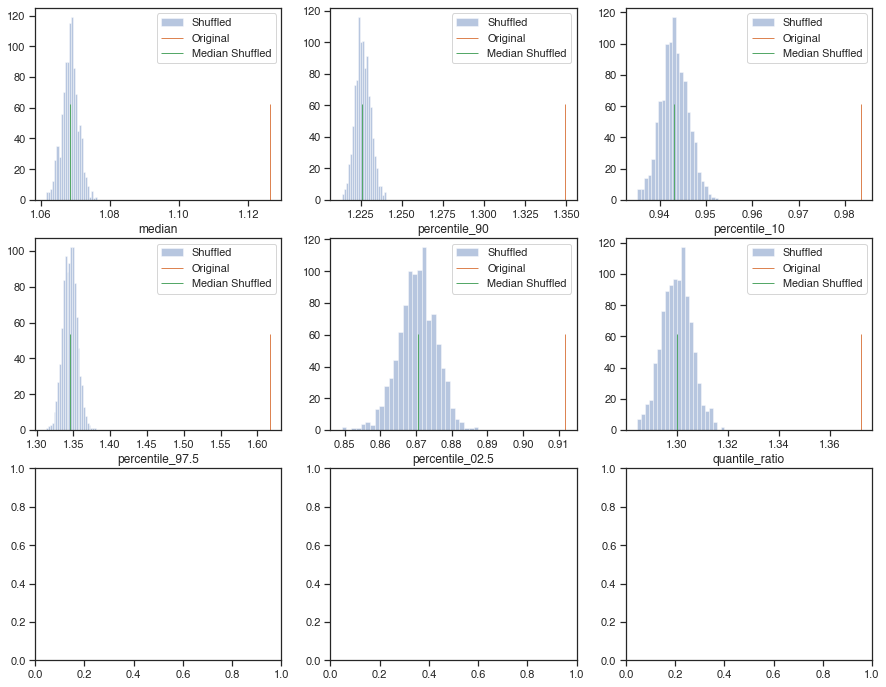

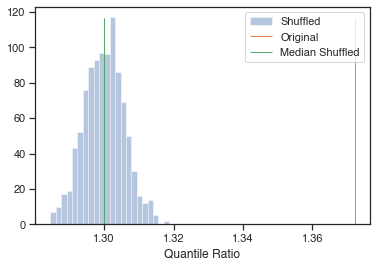

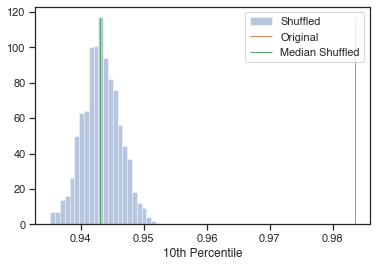

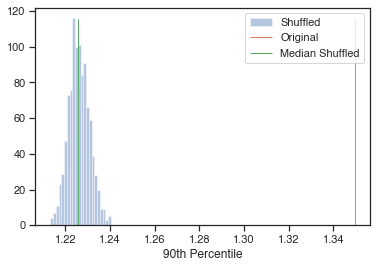

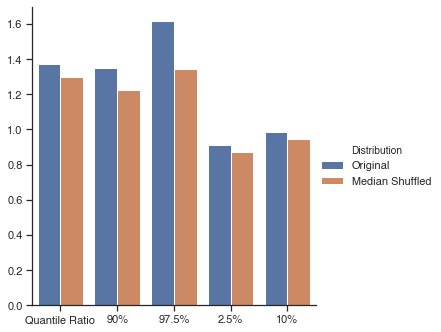

'Stretch 14'


shuf_mean median             1.164719
percentile_90      1.370539
percentile_10      1.003331
percentile_97.5    1.513869
percentile_02.5    0.925892
quantile_ratio     1.366034
dtype: float64
OrigDiff median             0.086878
percentile_90      0.189526
percentile_10      0.065859
percentile_97.5    0.362640
percentile_02.5    0.063598
quantile_ratio     0.093075
dtype: float64
shuf_diff              median  percentile_90  percentile_10  percentile_97.5  \
iteration                                                            
0          0.002139       0.000009       0.000639         0.008762   
1          0.005591       0.007266       0.005157         0.022385   
2          0.000806       0.011130       0.004135         0.016157   
3          0.002010       0.008019       0.007061         0.028433   
4          0.016060       0.010442       0.000482         0.017266   
...             ...            ...            ...              ...   
995        0.006215       0.006031       0.0

,orig_value,shuffled_value,pvalue
median,1.251597,1.164604,0.000999
percentile_90,1.560065,1.370201,0.000999
percentile_10,1.069190,1.003528,0.000999
percentile_97.5,1.876508,1.513243,0.000999
percentile_02.5,0.989489,0.926252,0.000999
quantile_ratio,1.459109,1.366249,0.000999


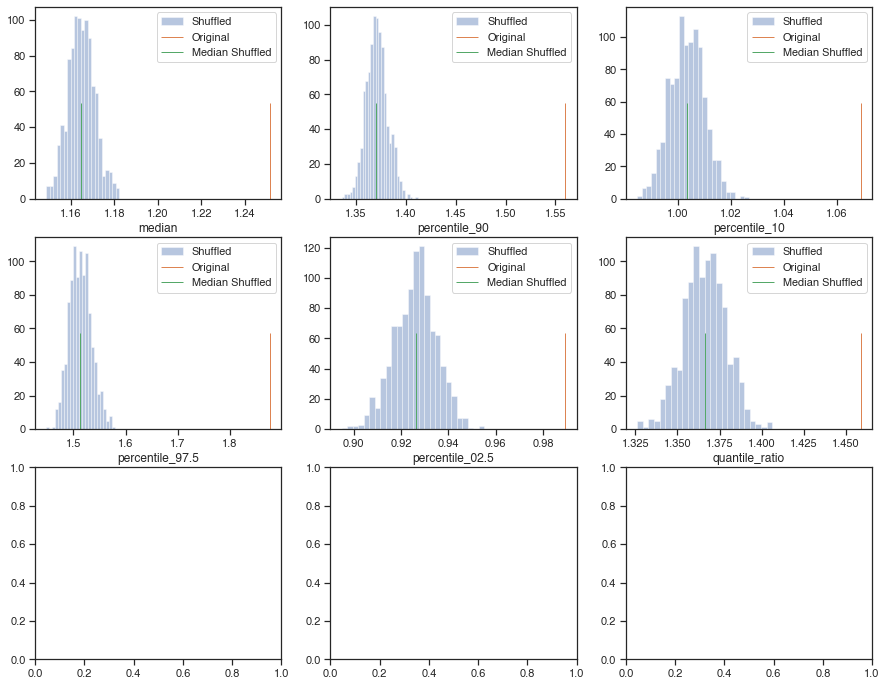

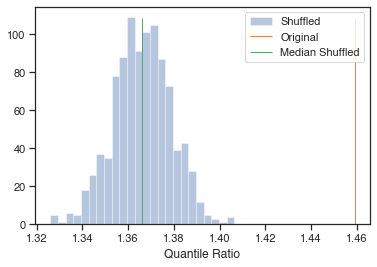

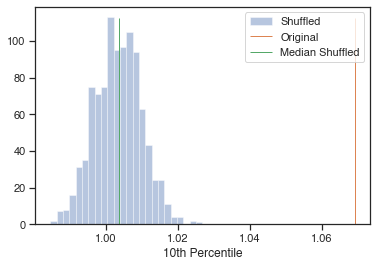

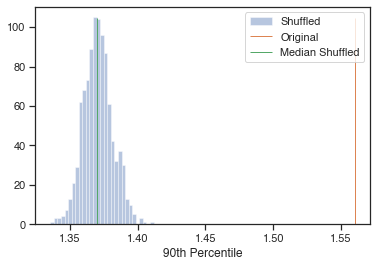

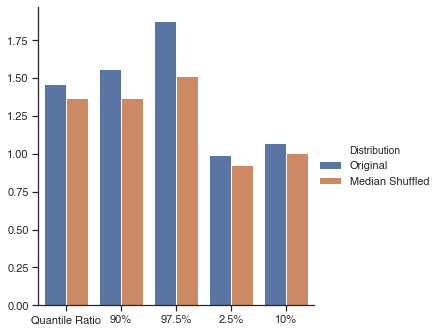

'Stretch 21'


shuf_mean median             1.263363
percentile_90      1.500661
percentile_10      1.076856
percentile_97.5    1.659978
percentile_02.5    0.992245
quantile_ratio     1.393680
dtype: float64
OrigDiff median             0.117238
percentile_90      0.247950
percentile_10      0.072243
percentile_97.5    0.550718
percentile_02.5    0.051140
quantile_ratio     0.128044
dtype: float64
shuf_diff              median  percentile_90  percentile_10  percentile_97.5  \
iteration                                                            
0          0.009943       0.004265       0.003412         0.003017   
1          0.000379       0.010117       0.013508         0.028647   
2          0.002523       0.011737       0.003148         0.023618   
3          0.012516       0.000821       0.018245         0.034016   
4          0.019711       0.007956       0.008064         0.041892   
...             ...            ...            ...              ...   
995        0.012524       0.002600       0.0

,orig_value,shuffled_value,pvalue
median,1.380601,1.263204,0.000999
percentile_90,1.748611,1.500856,0.000999
percentile_10,1.149099,1.077127,0.000999
percentile_97.5,2.210695,1.658720,0.000999
percentile_02.5,1.043384,0.992391,0.001998
quantile_ratio,1.521724,1.394218,0.000999


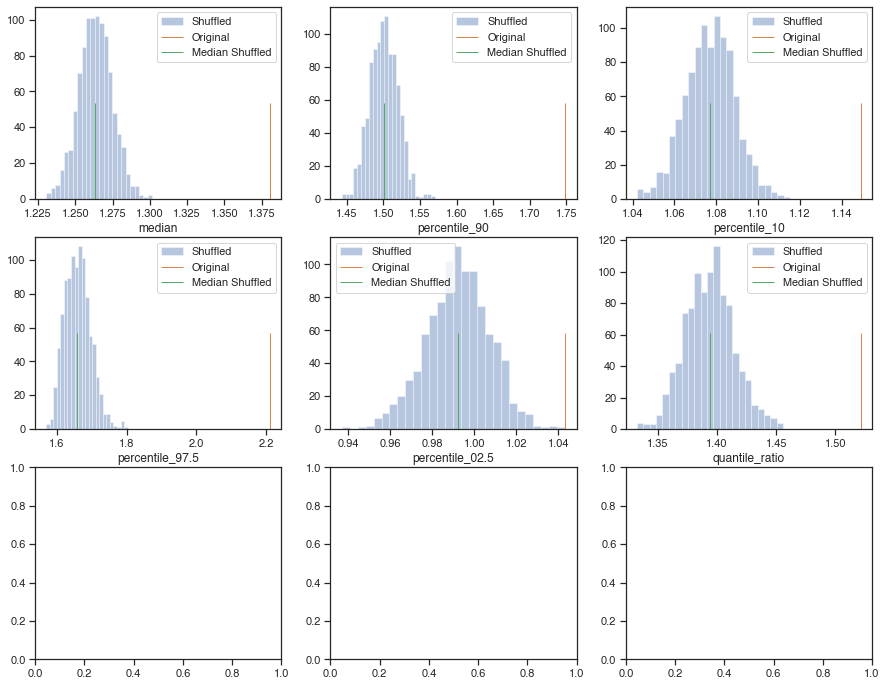

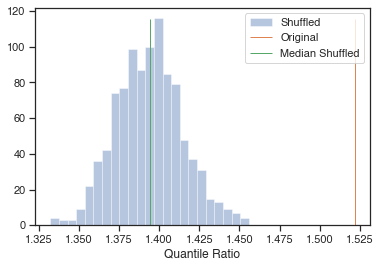

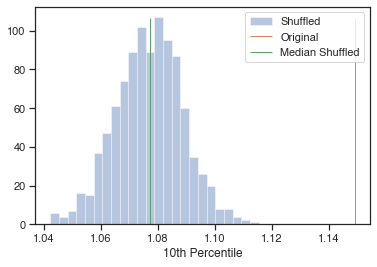

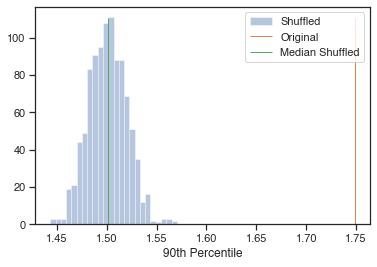

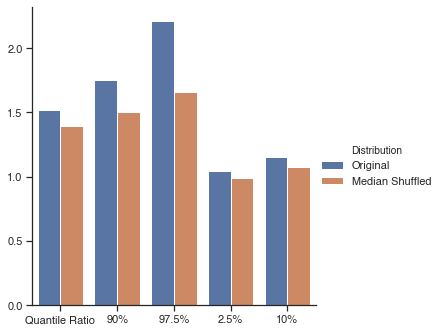

In [184]:
sns.set(context="notebook", style="ticks", font="Helvetica")
permutation_summaries = []
for stretch in [7,14,21]:
    display("Stretch "+str(stretch))
    orig = ic_df[(ic_df.stretch == stretch) & (ic_df.n_genes >= stretch / 7 * 6)]
    shuffled = shuffled_ic_df[(shuffled_ic_df.stretch == stretch) & (shuffled_ic_df.n_genes >= stretch / 7 * 6)]
    orig_statistics = get_statistics(orig)
    shuffled_statistics = shuffled.groupby("iteration").progress_apply(get_statistics)
#     total_shuffled_statistic = get_statistics(shuffled) #WRONG, this is not median
    total_shuffled_statistic = shuffled_statistics.median()
    
#     lower_count = (shuffled_statistics <= orig_statistics).sum()
#     upper_count = (shuffled_statistics >= orig_statistics).sum()
#     lower_pvalue = (lower_count + 1) / (shuffled_statistics.shape[0] + 1)
#     upper_pvalue = (upper_count + 1) / (shuffled_statistics.shape[0] + 1)
    
    shuf_mean = shuffled_statistics.mean(axis=0)
    orig_diff = np.abs(orig_statistics - shuf_mean)
    shuf_diff = shuffled_statistics.subtract(shuf_mean).abs()
    pvalue = ((shuf_diff >= orig_diff).sum(axis=0) + 1) / (shuffled_statistics.shape[0] + 1)
    print("shuf_mean",shuf_mean)
    print("OrigDiff",orig_diff)
    print("shuf_diff",shuf_diff)
    pvalues = pd.DataFrame({
        "orig_value": orig_statistics,
        "shuffled_value": total_shuffled_statistic,
#         "lower_count": lower_count,
#         "lower_pvalue": lower_pvalue,
#         "upper_count": upper_count,
#         "upper_pvalue": upper_pvalue,
        "pvalue": pvalue,
    })
#     pvalues["significance"] = pvalues.apply(lambda x: "LOWER" if x.lower_pvalue <= 0.025 else ("HIGHER" if x.upper_pvalue <= 0.025 else "-----"), axis=1)
    permutation_summaries += [pvalues]
    display(pvalues)
    
    _, axs = plt.subplots(3,3,figsize=(15,12))
    for ax, statistic in zip(np.array(axs).flatten(), orig_statistics.index):
        sns.distplot(shuffled_statistics[statistic], ax=ax, kde=False, rug=False, label="Shuffled")
        sns.distplot([orig_statistics[statistic]], ax=ax, kde=False, hist=False, rug=True, rug_kws={"height": 0.5}, label="Original")
        sns.distplot([total_shuffled_statistic[statistic]], ax=ax, kde=False, hist=False, rug=True, rug_kws={"height": 0.5}, label="Median Shuffled")
        ax.legend()
    plt.show()
    
    statistic = "quantile_ratio"
    sns.distplot(shuffled_statistics[statistic], kde=False, rug=False, label="Shuffled")
    sns.distplot([orig_statistics[statistic]], kde=False, hist=False, rug=True, rug_kws={"height": 0.95}, label="Original")
    sns.distplot([total_shuffled_statistic[statistic]], kde=False, hist=False, rug=True, rug_kws={"height": 0.95}, label="Median Shuffled")
    plt.legend()
    plt.xlabel("Quantile Ratio")
    plt.show()
    
    statistic = "percentile_10"
    sns.distplot(shuffled_statistics[statistic], kde=False, rug=False, label="Shuffled")
    sns.distplot([orig_statistics[statistic]], kde=False, hist=False, rug=True, rug_kws={"height": 0.95}, label="Original")
    sns.distplot([total_shuffled_statistic[statistic]], kde=False, hist=False, rug=True, rug_kws={"height": 0.95}, label="Median Shuffled")
    plt.legend()
    plt.xlabel("10th Percentile")
    plt.show()
    
    statistic = "percentile_90"
    sns.distplot(shuffled_statistics[statistic], kde=False, rug=False, label="Shuffled")
    sns.distplot([orig_statistics[statistic]], kde=False, hist=False, rug=True, rug_kws={"height": 0.95}, label="Original")
    sns.distplot([total_shuffled_statistic[statistic]], kde=False, hist=False, rug=True, rug_kws={"height": 0.95}, label="Median Shuffled")
    plt.legend()
    plt.xlabel("90th Percentile")
    plt.show()
    
    df = pd.DataFrame([
        ["Quantile Ratio", pvalues.loc["quantile_ratio", "orig_value"], "Original"],
        ["Quantile Ratio", pvalues.loc["quantile_ratio", "shuffled_value"], "Median Shuffled"],
        ["90%", pvalues.loc["percentile_90", "orig_value"], "Original"],
        ["90%", pvalues.loc["percentile_90", "shuffled_value"], "Median Shuffled"],
        ["97.5%", pvalues.loc["percentile_97.5", "orig_value"], "Original"],
        ["97.5%", pvalues.loc["percentile_97.5", "shuffled_value"], "Median Shuffled"],
        ["2.5%", pvalues.loc["percentile_02.5", "orig_value"], "Original"],
        ["2.5%", pvalues.loc["percentile_02.5", "shuffled_value"], "Median Shuffled"],
        ["10%", pvalues.loc["percentile_10", "orig_value"], "Original"],
        ["10%", pvalues.loc["percentile_10", "shuffled_value"], "Median Shuffled"],
    ], columns=["metric", "value", "Distribution"])

    sns.catplot(data=df, x="metric", y="value", hue="Distribution", kind="bar", sharey=False)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()
    
#     if stretch == 14:
    pvalues.index.name = "metric"
    pvalues.to_csv("{}/chr_stat_test_pvalues_{}.csv".format(dataset, stretch))
    